# Datenvisualisierung mit `matplotlib`

In [146]:
from matplotlib import pyplot as plt
from pandas import read_csv
from numpy import mean, max, min, std
from numpy import arange

## Daten Laden

In [6]:
data = read_csv("data/diamonds.csv", sep=",")

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print(data["carat"].values)
print(data["carat"].name)
print(data["carat"].index)
print(data["carat"].dtype)

[0.23 0.21 0.23 ... 0.7  0.86 0.75]
carat
RangeIndex(start=0, stop=53940, step=1)
float64


## Visualisieren

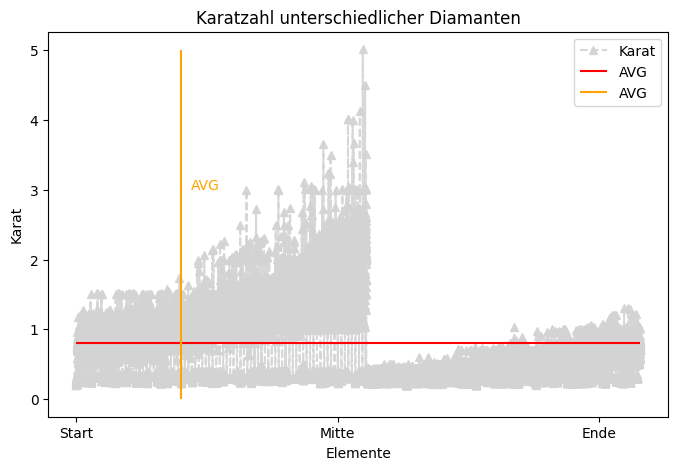

In [20]:
plt.style.use("default")
plt.figure(figsize=(8, 5))

plt.plot(
    data["carat"],
    "--^",
    color="lightgrey",
    label="Karat",
    alpha=0.9
)

plt.hlines(
    y=mean(data["carat"]),
    xmin=0,
    xmax=len(data["carat"]),
    color="r",
    label="AVG"
)

plt.vlines(
    x=10000,
    ymin=0,
    ymax=5,
    color="orange",
    label="AVG"
)

plt.text(
    x=11000,
    y=3,
    s="AVG",
    color="orange"
)

plt.legend(loc=0)
plt.title("Karatzahl unterschiedlicher Diamanten")
plt.xlabel("Elemente")
plt.ylabel("Karat")

plt.xticks([0, 25000, 50000], labels=["Start", "Mitte", "Ende"])
plt.yticks(range(0, 6, 1))

plt.savefig("Mein_Testplot.jpg")
plt.show()

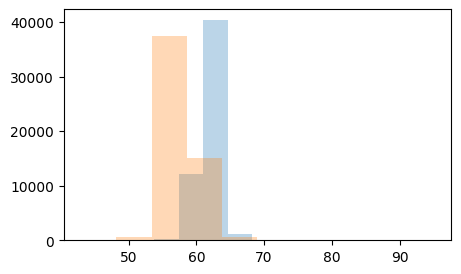

In [28]:
plt.figure(figsize=(5,3))
plt.hist(data["depth"], alpha=0.3)
plt.hist(data["table"], alpha=0.3)
plt.show()

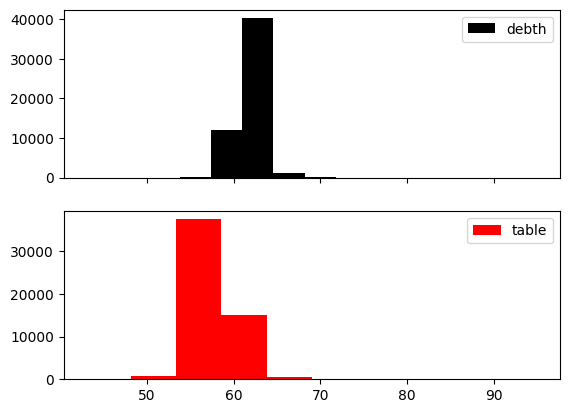

In [40]:
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)
ax[0].hist(data["depth"], label="debth", color="k")
ax[1].hist(data["table"], label="table", color="r")
ax[0].legend()
ax[1].legend()
plt.show()

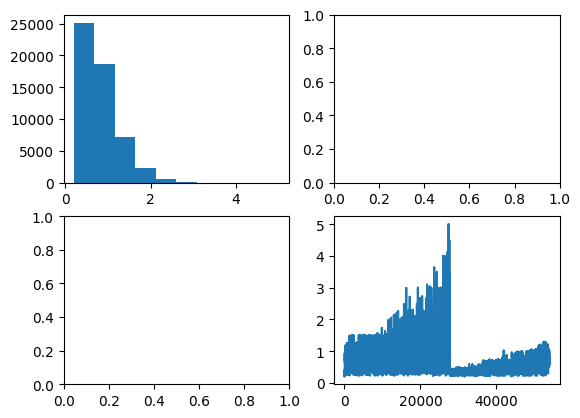

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].hist(data["carat"])
ax[1,1].plot(data["carat"])

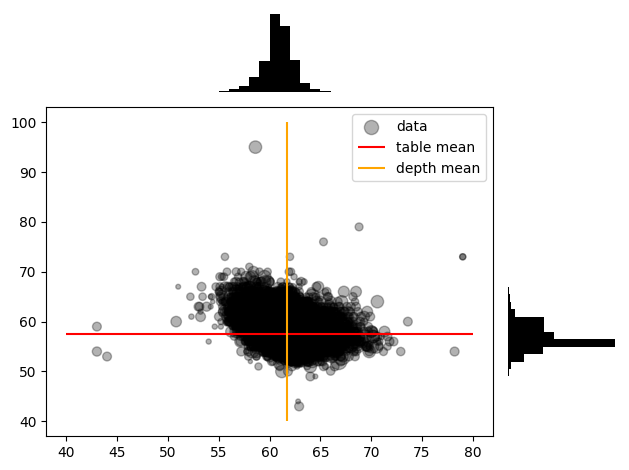

In [85]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    gridspec_kw={
        "width_ratios": (4,1),
        "height_ratios": (1,4)
    }
)

ax[1,0].scatter(
    x=data["depth"],
    y=data["table"],
    alpha=0.3,
    marker="o",
    color="k",
    label="data",
    s=data["carat"]*40
)

ax[1,0].hlines(xmin=40, xmax=80, y=mean(data["table"]), color="red", label="table mean")
ax[1,0].vlines(ymin=40, ymax=100, x=mean(data["depth"]), color="orange", label="depth mean")
ax[1,0].legend()

ax[1,1].hist(data["table"], orientation="horizontal", bins=40, color="k")
ax[1,1].axis("off")

ax[0,0].hist(data["depth"], bins=40, color="k")
ax[0,0].axis("off")

ax[0,1].axis("off")

plt.tight_layout()
plt.show()

In [86]:
data.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


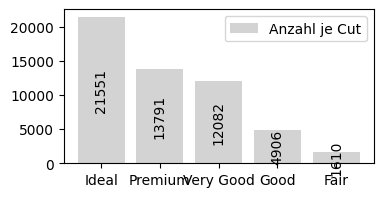

In [110]:
plt.figure(figsize=(4,2))

bars = plt.bar(
    height=data["cut"].value_counts(),
    x=data["cut"].value_counts().index,
    color="lightgrey",
    label="Anzahl je Cut"
)

plt.bar_label(bars, label_type="center", rotation=90)
plt.legend()

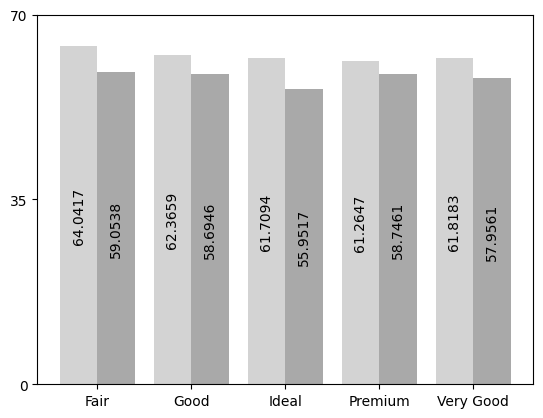

In [165]:
width = 0.4

depth_bar = plt.bar(
    height = data[["cut", "depth"]].groupby(["cut"]).mean()["depth"],
    x = arange(0,5,1) - width/2,
    label = "AVG debth size",
    width = width,
    color="lightgrey"
)

table_bar = plt.bar(
    height = data[["cut", "table"]].groupby(["cut"]).mean()["table"],
    x = arange(0,5,1) + width/2,
    label="AVG table size",
    width = width,
    color="darkgrey"
)

plt.bar_label(depth_bar, rotation=90, label_type="center")
plt.bar_label(table_bar, rotation=90, label_type="center")

plt.xticks(range(0,5,1), labels=data[["cut", "table"]].groupby(["cut"]).mean().index)
plt.yticks([0,35,70])

plt.show()

<BarContainer object of 5 artists>

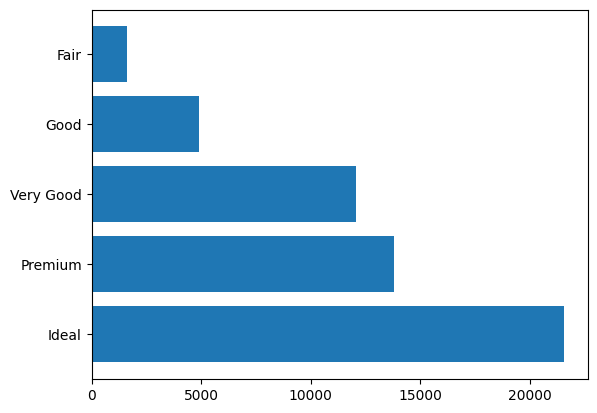

In [187]:
plt.barh(
    width=data["cut"].value_counts(),
    y=data["cut"].value_counts().index
)

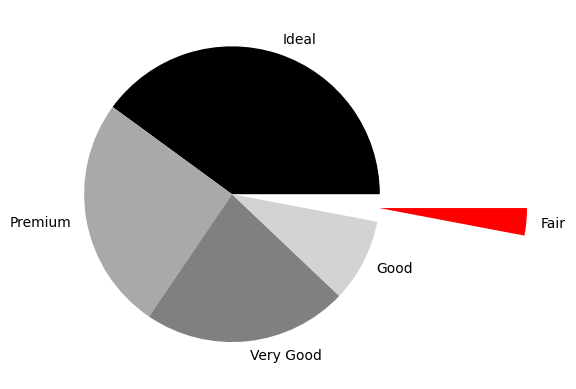

In [184]:
plt.pie(
    x = data["cut"].value_counts(),
    explode=[0,0,0,0,1],
    colors=["k","darkgrey","grey","lightgrey","red"],
    labels=data["cut"].value_counts().index,
    labeldistance=1.1
)
plt.show()